In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
data = pd.read_csv('data/ironhack_careers.csv')
df = data.copy()
df.head()

,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired
0,46987,Débora Peres Moreno de Souza,pmsdeb.ie@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-13,13,0,0,0,0,0
1,46963,Fernando Rocha,fernando.rocha@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,35,34,9,8,1,0
2,46961,Marta Cacabelos Martínez,marta.cacabelos.mtnez@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,0,0,0,0,0,0
3,46956,Renato Filipe,renatofilipe1@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2022-01-11,5,0,0,0,0,0
4,46946,Milton Correa,miltoncorrea6@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-10,0,0,0,0,0,0


In [188]:
df.describe()

,id,saved,applied,inContact,interview,offer,hired
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,45287.954751,37.656109,27.171946,6.307692,3.488688,0.176471,0.565611
std,1371.467859,44.247335,40.200490,10.008423,5.084389,0.447811,0.514776
min,42735.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44232.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,45499.000000,23.000000,13.000000,3.000000,1.000000,0.000000,1.000000
75%,46488.000000,48.000000,34.000000,9.000000,5.000000,0.000000,1.000000
max,46987.000000,374.000000,367.000000,95.000000,28.000000,2.000000,2.000000


In [189]:
df.dtypes

id                  int64
full_name          object
email              object
cohort             object
curriculum         object
graduation_date    object
status             object
date_registered    object
saved               int64
applied             int64
inContact           int64
interview           int64
offer               int64
hired               int64
dtype: object

In [190]:
# strip columns (remove spaces)
for col in df.columns:
    if type(col) == object:
        df[col] = df[col].apply(lambda x : x.strip())
    else:
        continue

In [191]:
ux = df['curriculum'] == 'UXUI'
da = df['curriculum'] == 'Data Analytics'
wd = df['curriculum'] == 'Web Dev'
print(len(df))
print(len(df[ux]) + len(df[da]) + len(df[wd]))

221
216


In [192]:
df[df['curriculum'] == 'Cybersecurity']

,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired
77,46357,André Almeida,andralmeida3@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Actively Seeking,2021-09-20,2,1,0,0,0,0
78,46356,João Gil,joaomiguelnunesgil@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Passively Seeking,2021-09-20,22,13,0,0,0,0
79,46353,Louise Altvater,louise.altvater@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Hired,2021-09-20,48,46,9,6,1,0
80,46351,Maria do Rosário Exposto,roexposto@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Hired,2021-09-20,37,34,5,5,0,0
81,46346,Francisco Campos,francisco.campos.b@hotmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Hired,2021-09-20,118,118,27,16,1,0


In [193]:
df = df[df['curriculum'] != 'Cybersecurity']

In [194]:
print(len(df))
print(len(df[ux]) + len(df[da]) + len(df[wd]))

216
216


/var/folders/zw/4thxf2jn0h5cjn61m7hjsvr00000gp/T/ipykernel_13522/1080565995.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[ux]) + len(df[da]) + len(df[wd]))


In [195]:
print("Cohorts:", df.cohort.unique())
print("Curriculums", df.curriculum.unique())
print("Graduation dates:", df.graduation_date.unique())
print("Status:", df.status.unique())
print("Hired:", df.hired.unique())

Cohorts: ['LIS-UXUIFT-Oct2021' 'LIS-DATAFT-Oct2021' 'LIS-WDFT-Oct2021'
 'LIS-UXUIPT-Mar2021' 'LIS-WDFT-Aug2021' 'LIS-DATAPT-Mar2021'
 'LIS-UXUIFT-Aug2021' 'LIS-WDFT-May2021' 'LIS-DATAFT-May2021'
 'LIS-WDFT-Mar2021' 'LIS-DATAFT-Mar2021' 'LIS-UXUIFT-Mar2021'
 'LIS-WDPT-Oct2020' 'LIS-DATAPT-Oct2020' 'LIS-PTFEB-WEB'
 'LIS-DATAFTJan2021' 'LIS-WDFTJan2021' 'LIS-WDFT06' 'LIS-UXFT10'
 'LIS-WDFT10' 'LIS-DAFT10' 'LIS-DAFT06' 'LIS-PTFEB-DATA' 'LIS-UXUIFT04'
 'LIS-WDFT04']
Curriculums ['UXUI' 'Data Analytics' 'Web Dev']
Graduation dates: ['2021-12-17' '2021-10-22' '2021-10-08' '2021-10-23' '2021-07-30'
 '2021-05-21' '2021-05-08' '2020-07-31' '2021-03-12' '2020-08-31'
 '2020-12-11' '2020-06-15']
Status: ['Actively Seeking' 'Not Seeking' 'Hired' 'Passively Seeking'
 'Not seeking' 'Not Graduated']
Hired: [0 1 2]


In [196]:
df[df['status'] == 'Not seeking']['status'] = 'Not Seeking'
df.status.unique()

/var/folders/zw/4thxf2jn0h5cjn61m7hjsvr00000gp/T/ipykernel_13522/2446374422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['status'] == 'Not seeking']['status'] = 'Not Seeking'


array(['Actively Seeking', 'Not Seeking', 'Hired', 'Passively Seeking',
       'Not seeking', 'Not Graduated'], dtype=object)

In [197]:
df[df['hired'] == 2]['hired'] = 1

/var/folders/zw/4thxf2jn0h5cjn61m7hjsvr00000gp/T/ipykernel_13522/401468499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['hired'] == 2]['hired'] = 1


In [198]:
#df.head()
df.hired.unique()

array([0, 1, 2])

In [199]:
df['conv_applied_interview'] = df.apply(lambda x : x['interview']/x['applied'] if x['applied'] != 0 else 0, axis=1)
df['conv_interview_hired'] = df.apply(lambda x : x['hired']/x['interview'] if x['interview'] != 0 else 0, axis=1)


In [200]:
df['conv_applied_interview'].value_counts()

0.000000    85
0.333333     9
0.200000     7
0.500000     4
0.111111     4
            ..
0.119403     1
0.020134     1
0.051724     1
0.078431     1
0.529412     1
Name: conv_applied_interview, Length: 94, dtype: int64

In [201]:
df['conv_interview_hired'].value_counts()

0.000000    126
0.333333     15
1.000000     13
0.500000      9
0.250000      9
0.111111      7
0.166667      6
0.125000      5
0.200000      5
0.142857      3
0.100000      3
0.062500      3
0.047619      2
0.071429      2
0.055556      1
0.076923      1
0.045455      1
0.052632      1
0.153846      1
0.083333      1
0.066667      1
0.090909      1
Name: conv_interview_hired, dtype: int64

In [202]:
df

,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
0,46987,Débora Peres Moreno de Souza,pmsdeb.ie@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-13,13,0,0,0,0,0,0.000000,0.000000
1,46963,Fernando Rocha,fernando.rocha@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,35,34,9,8,1,0,0.235294,0.000000
2,46961,Marta Cacabelos Martínez,marta.cacabelos.mtnez@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,0,0,0,0,0,0,0.000000,0.000000
3,46956,Renato Filipe,renatofilipe1@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2022-01-11,5,0,0,0,0,0,0.000000,0.000000
4,46946,Milton Correa,miltoncorrea6@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-10,0,0,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,42744,Susanne Aubert,susanneaubert@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,119,74,6,4,0,1,0.054054,0.250000
217,42743,Laissa Moura Ferreira,laissamf@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,67,12,1,15,0,1,1.250000,0.066667
218,42741,Cesar Mello,cesarpcj@hotmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,66,48,2,11,0,1,0.229167,0.090909
219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,129,77,0,1,0,1,0.012987,1.000000


In [203]:
df.to_csv('data/ironhack_careers_clean.csv')

In [204]:
df.groupby(['curriculum', 'cohort']).agg({'id':'count'})
df.groupby(['curriculum', 'cohort']).agg({'applied':'mean', 'id':'count', 'interview' : 'mean'})
df.groupby(['curriculum', 'cohort', 'hired']).agg({'id':'count', 'hired':'count'})

id  hired
curriculum     cohort             hired           
Data Analytics LIS-DAFT06         0       1      1
                                  1       6      6
                                  2       1      1
               LIS-DAFT10         0       2      2
                                  1      10     10
               LIS-DATAFT-Mar2021 0       1      1
                                  1       3      3
               LIS-DATAFT-May2021 0       3      3
                                  1       1      1
                                  2       1      1
               LIS-DATAFT-Oct2021 0       7      7
                                  1       2      2
               LIS-DATAFTJan2021  0       1      1
                                  1       4      4
               LIS-DATAPT-Mar2021 0       3      3
                                  1       1      1
               LIS-DATAPT-Oct2020 0       4      4
                                  1       1      1
               LIS-PTFEB-DATA     0       1      1
                                  1       2      2
UXUI           LIS-UXFT10         0       2      2
                                  1      14     14
               LIS-UXUIFT-Aug2021 0       6      6
                                  1       8      8
               LIS-UXUIFT-Mar2021 0       3      3
                                  1       2      2
               LIS-UXUIFT-Oct2021 0      13     13
                                  1       1      1
               LIS-UXUIFT04       0       2      2
                                  1       7      7
               LIS-UXUIPT-Mar2021 0       7      7
Web Dev        LIS-PTFEB-WEB      0       3      3
                                  1       3      3
               LIS-WDFT-Aug2021   0       4      4
                                  1       8      8
               LIS-WDFT-Mar2021   0       6      6
                                  1       4      4
               LIS-WDFT-May2021   0       6      6
                                  1       3      3
               LIS-WDFT-Oct2021   0      11     11
                                  1       6      6
               LIS-WDFT04         0       2      2
                                  1       9      9
               LIS-WDFT06         0       1      1
                                  1       9      9
               LIS-WDFT10         0       1      1
                                  1      12     12
               LIS-WDFTJan2021    0       1      1
                                  1       3      3
               LIS-WDPT-Oct2020   0       2      2
                                  1       2      2

In [205]:
clean_data = pd.read_csv("data/ironhack_careers_clean.csv")
clean_data.head()

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
0,0,46987,Débora Peres Moreno de Souza,pmsdeb.ie@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-13,13,0,0,0,0,0,0.000000,0.0
1,1,46963,Fernando Rocha,fernando.rocha@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,35,34,9,8,1,0,0.235294,0.0
2,2,46961,Marta Cacabelos Martínez,marta.cacabelos.mtnez@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,0,0,0,0,0,0,0.000000,0.0
3,3,46956,Renato Filipe,renatofilipe1@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2022-01-11,5,0,0,0,0,0,0.000000,0.0
4,4,46946,Milton Correa,miltoncorrea6@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-10,0,0,0,0,0,0,0.000000,0.0


In [206]:
clean_data["graduation_date"]

0      2021-12-17
1      2021-12-17
2      2021-12-17
3      2021-12-17
4      2021-12-17
          ...    
211    2020-06-15
212    2020-06-15
213    2020-06-15
214    2020-06-15
215    2020-06-15
Name: graduation_date, Length: 216, dtype: object

In [207]:
clean_data["graduation_date"] = pd.to_datetime(clean_data["graduation_date"], format="%Y-%m-%d")
clean_data.sort_values("graduation_date", inplace=True)

In [208]:
clean_data

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,33,17,0,9,2,1,0.529412,0.111111
214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,129,77,0,1,0,1,0.012987,1.000000
196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,24,11,0,0,0,1,0.000000,0.000000
197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,21,5,0,3,0,1,0.600000,0.333333
199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,140,54,7,14,1,1,0.259259,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,0,0,0,0,0,0,0.000000,0.000000
24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,4,2,2,2,0,1,1.000000,0.500000
23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,35,35,0,0,0,0,0.000000,0.000000
32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,2,1,0,0,0,0,0.000000,0.000000


In [209]:
# students searching
condition1 = clean_data['status'] == 'Actively Seeking'
condition2 = clean_data['status'] == 'Passively Seeking'
len(clean_data[condition1 | condition2])

49

In [210]:
len(clean_data[clean_data['hired'] == 1])

121

In [243]:
conv_rate = clean_data.groupby(['curriculum', 'cohort', 'graduation_date']).agg({'conv_applied_interview': 'mean', 'conv_interview_hired': 'mean'})#lambda x : x.mean()/len(x)
conv_rate = conv_rate.sort_values(by='conv_applied_interview', ascending=False).reset_index()
conv_rate

,curriculum,cohort,graduation_date,conv_applied_interview,conv_interview_hired
0,UXUI,LIS-UXUIPT-Mar2021,2021-10-22,0.451967,0.000000
1,Web Dev,LIS-WDFT-May2021,2021-07-30,0.433654,0.134568
2,Web Dev,LIS-WDFT10,2020-12-11,0.391455,0.192155
3,Data Analytics,LIS-DATAFTJan2021,2021-03-12,0.372727,0.051111
4,Web Dev,LIS-WDFT04,2020-06-15,0.315267,0.231028
5,Web Dev,LIS-WDFT06,2020-08-31,0.271997,0.264291
6,Web Dev,LIS-PTFEB-WEB,2020-07-31,0.221162,0.081650
7,Web Dev,LIS-WDPT-Oct2020,2021-05-08,0.208333,0.025000
8,Data Analytics,LIS-DAFT06,2020-08-31,0.201975,0.154647
9,Web Dev,LIS-WDFT-Oct2021,2021-12-17,0.201809,0.058333


In [244]:
uxui = conv_rate[conv_rate.curriculum == 'UXUI'].sort_values(by='graduation_date')
uxui

,curriculum,cohort,graduation_date,conv_applied_interview,conv_interview_hired
10,UXUI,LIS-UXUIFT04,2020-06-15,0.188206,0.238889
19,UXUI,LIS-UXFT10,2020-12-11,0.110960,0.248512
24,UXUI,LIS-UXUIFT-Mar2021,2021-05-21,0.000000,0.000000
15,UXUI,LIS-UXUIFT-Aug2021,2021-10-08,0.144372,0.118452
0,UXUI,LIS-UXUIPT-Mar2021,2021-10-22,0.451967,0.000000
21,UXUI,LIS-UXUIFT-Oct2021,2021-12-17,0.065423,0.035714


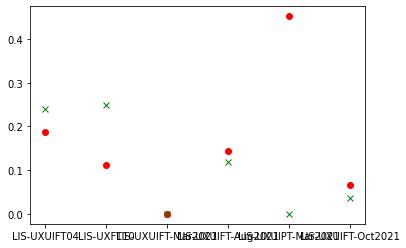

In [245]:
plt.plot(uxui['cohort'], uxui['conv_applied_interview'], 'ro')
plt.plot(uxui['cohort'], uxui['conv_interview_hired'], 'gx')
plt.show()

In [217]:
conv_rate2 = clean_data.groupby('curriculum').agg({'conv_interview_hired': 'mean'})
conv_rate2

,conv_interview_hired
curriculum,
Data Analytics,0.140319
UXUI,0.127454
Web Dev,0.145106


In [220]:
clean_data[clean_data['cohort'] == 'LIS-DAFT06'] 

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
172,177,43677,Melissa Badrudin,melissabadrudin93@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-20,24,21,3,3,0,1,0.142857,0.333333
183,188,43599,Rafael Barbosa Bandeira De Mello,rbmello@icloud.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,60,51,17,13,0,2,0.254902,0.153846
191,196,43500,João Inverno,j.inverno@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,31,20,1,4,1,1,0.200000,0.250000
189,194,43502,Diogo Merces,diogocarlos853@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,22,14,2,0,0,1,0.000000,0.000000
185,190,43596,Celina Agostinho,cfm.agostinho@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Passively Seeking,2020-09-01,77,62,5,7,0,0,0.112903,0.000000
184,189,43598,Joan Concha,jrenato.concha@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,32,22,13,6,0,1,0.272727,0.166667
188,193,43503,João Quintela,joaoquintela0@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,56,46,10,4,2,1,0.086957,0.250000
195,200,43495,Jorge Marques,jormarq1@hotmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,40,22,12,12,2,1,0.545455,0.083333


In [213]:
clean_data[clean_data['curriculum'] == 'Web Dev']

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,33,17,0,9,2,1,0.529412,0.111111
197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,21,5,0,3,0,1,0.600000,0.333333
199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,140,54,7,14,1,1,0.259259,0.071429
200,205,42828,Cristiane Koshino,cristianekoshino@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,26,16,0,1,0,1,0.062500,1.000000
201,206,42827,Fábio Guerreiro,ffsguerreiro@hotmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,41,7,0,3,0,1,0.428571,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,21,46894,Raissa Damasceno,raissa.cod@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Actively Seeking,2021-12-21,5,2,1,1,0,0,0.500000,0.000000
30,30,46862,Ricardo Franco,ricardofranco14@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Actively Seeking,2021-12-20,9,9,5,1,0,0,0.111111,0.000000
28,28,46864,Anne Dantas,annedantas@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,30,29,8,6,1,1,0.206897,0.166667
27,27,46865,Yuri Farias,yurisfarias@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,0,0,0,0,0,1,0.000000,0.000000


In [214]:
clean_data[clean_data['curriculum'] == 'Data Analytics'].count()

Unnamed: 0                55
id                        55
full_name                 55
email                     55
cohort                    55
curriculum                55
graduation_date           55
status                    55
date_registered           55
saved                     55
applied                   55
inContact                 55
interview                 55
offer                     55
hired                     55
conv_applied_interview    55
conv_interview_hired      55
dtype: int64

In [246]:
clean_data[clean_data['cohort'] == 'LIS-UXUIPT-Mar2021']

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
19,19,46917,Diogo Monteiro,diogopmonteiro_@hotmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2022-01-10,0,0,0,0,0,0,0.000000,0.0
43,43,46774,Anaísa Faria,anaisagfaria@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,3,1,2,2,0,0,2.000000,0.0
44,44,46771,Dragana Martinovic,draganau17@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,29,24,4,1,0,0,0.041667,0.0
45,45,46769,Pedro del Rio,pedro@thedelrioux.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,185,182,2,2,1,0,0.010989,0.0
42,42,46775,Vanessa Lopes,vanessalopes.uxdesigner@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,15,2,3,0,0,0,0.000000,0.0
20,20,46909,Joana Louro,joanalouro@outlook.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2022-01-05,29,2,2,2,0,0,1.000000,0.0
46,46,46768,Andreia Caeiro,caeiro.andreia@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,13,9,2,1,0,0,0.111111,0.0
